# **Group Members**
Group 22

Sean Oberer
Vatsal Rathod
Piyush Jain
Garrison Bolick
Anuj Sharma

#**NFL Fantasyleague Prediction**
For our project, we want to try to predict the a running backs fantasy points per game based on a variety of independent variables that represent a running backs production such as targets, rushing yards, passing yards, touchdowns, etc.. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model   # Defines regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline


In [5]:
df = pd.read_csv("ff_rb.csv")
df.head()

,Rank,Player,ATT,YDS,Y/ATT,LG,20+,TD,REC,TGT,YDS.1,Y/REC,TD.1,FL,G,FPTS,FPTS/G,RUSHYRDS/G,PASSYDS/G,ATT/G,TGT/G,RUSHTD/G,PASSTD/G,TOTTD/G
0,1,Saquon Barkley (NYG),261,"1,307",5.0,78,16,11,91,121,721,7.9,4,0,16,385.8,24.112500,81.687500,45.062500,16.312500,7.562500,0.687500,0.250000,0.9375
1,2,Christian McCaffrey (CAR),219,"1,098",5.0,59,6,7,107,124,867,8.1,6,1,16,385.5,24.093750,68.625000,54.187500,13.687500,7.750000,0.437500,0.375000,0.8125
2,3,Todd Gurley II (FA),256,"1,251",4.9,36,11,17,59,81,580,9.8,4,1,14,372.1,26.578571,89.357143,41.428571,18.285714,5.785714,1.214286,0.285714,1.5000
3,4,Alvin Kamara (NO),194,883,4.6,49,1,14,81,105,709,8.8,4,0,15,354.2,23.613333,58.866667,47.266667,12.933333,7.000000,0.933333,0.266667,1.2000
4,5,Ezekiel Elliott (DAL),304,"1,435",4.7,41,11,6,77,95,567,7.4,3,1,15,329.2,21.946667,95.666667,37.800000,20.266667,6.333333,0.400000,0.200000,0.6000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        199 non-null    int64  
 1   Player      199 non-null    object 
 2   ATT         199 non-null    int64  
 3   YDS         199 non-null    object 
 4   Y/ATT       199 non-null    float64
 5   LG          199 non-null    int64  
 6   20+         199 non-null    int64  
 7   TD          199 non-null    int64  
 8   REC         199 non-null    int64  
 9   TGT         199 non-null    int64  
 10  YDS.1       199 non-null    object 
 11  Y/REC       199 non-null    float64
 12  TD.1        199 non-null    int64  
 13  FL          199 non-null    int64  
 14  G           199 non-null    int64  
 15  FPTS        199 non-null    float64
 16  FPTS/G      199 non-null    float64
 17  RUSHYRDS/G  199 non-null    float64
 18  PASSYDS/G   199 non-null    float64
 19  ATT/G       199 non-null    f

In [7]:
df['FPTS/G'] = df['FPTS/G'].astype(float, errors='raise')

In [8]:
# To remove commas(',')
df = df.replace(',','', regex=True)

In [9]:
df['YDS.1'] = df['YDS.1'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        199 non-null    int64  
 1   Player      199 non-null    object 
 2   ATT         199 non-null    int64  
 3   YDS         199 non-null    object 
 4   Y/ATT       199 non-null    float64
 5   LG          199 non-null    int64  
 6   20+         199 non-null    int64  
 7   TD          199 non-null    int64  
 8   REC         199 non-null    int64  
 9   TGT         199 non-null    int64  
 10  YDS.1       199 non-null    int64  
 11  Y/REC       199 non-null    float64
 12  TD.1        199 non-null    int64  
 13  FL          199 non-null    int64  
 14  G           199 non-null    int64  
 15  FPTS        199 non-null    float64
 16  FPTS/G      199 non-null    float64
 17  RUSHYRDS/G  199 non-null    float64
 18  PASSYDS/G   199 non-null    float64
 19  ATT/G       199 non-null    f

In [11]:
df.head()

,Rank,Player,ATT,YDS,Y/ATT,LG,20+,TD,REC,TGT,YDS.1,Y/REC,TD.1,FL,G,FPTS,FPTS/G,RUSHYRDS/G,PASSYDS/G,ATT/G,TGT/G,RUSHTD/G,PASSTD/G,TOTTD/G
0,1,Saquon Barkley (NYG),261,1307,5.0,78,16,11,91,121,721,7.9,4,0,16,385.8,24.112500,81.687500,45.062500,16.312500,7.562500,0.687500,0.250000,0.9375
1,2,Christian McCaffrey (CAR),219,1098,5.0,59,6,7,107,124,867,8.1,6,1,16,385.5,24.093750,68.625000,54.187500,13.687500,7.750000,0.437500,0.375000,0.8125
2,3,Todd Gurley II (FA),256,1251,4.9,36,11,17,59,81,580,9.8,4,1,14,372.1,26.578571,89.357143,41.428571,18.285714,5.785714,1.214286,0.285714,1.5000
3,4,Alvin Kamara (NO),194,883,4.6,49,1,14,81,105,709,8.8,4,0,15,354.2,23.613333,58.866667,47.266667,12.933333,7.000000,0.933333,0.266667,1.2000
4,5,Ezekiel Elliott (DAL),304,1435,4.7,41,11,6,77,95,567,7.4,3,1,15,329.2,21.946667,95.666667,37.800000,20.266667,6.333333,0.400000,0.200000,0.6000


In [12]:
#sns.pairplot(df)
 
# After loading in our data, we want to create a pairplot with our dataset to see the correlation
# between our independent variables and dependent variables. After creating our pairplot we realized that
# we have way too many independent variables and need to eliminate some to build our models

We realized we had too many columns for this dataset so we wanted to narrow down our independent variables to the ones we thought would have the most value/correlation toward our dependent variable. Upon further discussion, we thought that the best way to accurately predict a running backs fantasy production would be to try to predict their fantasy points per game on average since that will account for discrepencies among running backs due to injuries and other factors where players don't play that ultimately effects their total point production. 

As a result, we decided to take the independent variables and change them to be the same unit of measure as our dependent variable (FPTS/G). We did this by taking the players totals for each season - FPTS, total yards, touchdowns, etc. and divided it by the number of games we played in to create the yards per game, touchdowns per game, etc. columns to use for our project.

Below - we will create our new data frame with our newly calculated independent variables and we will visualize the relationship between all of our independent and dependent variables using pairplot.

In [13]:
values_per_goals = df.filter(['FPTS/G','RUSHYRDS/G','PASSYDS/G','ATT/G','TGT/G','RUSHTD/G','PASSTD/G','TOTTD/G'], axis=1)

In [14]:
values_per_goals.head()

,FPTS/G,RUSHYRDS/G,PASSYDS/G,ATT/G,TGT/G,RUSHTD/G,PASSTD/G,TOTTD/G
0,24.112500,81.687500,45.062500,16.312500,7.562500,0.687500,0.250000,0.9375
1,24.093750,68.625000,54.187500,13.687500,7.750000,0.437500,0.375000,0.8125
2,26.578571,89.357143,41.428571,18.285714,5.785714,1.214286,0.285714,1.5000
3,23.613333,58.866667,47.266667,12.933333,7.000000,0.933333,0.266667,1.2000
4,21.946667,95.666667,37.800000,20.266667,6.333333,0.400000,0.200000,0.6000


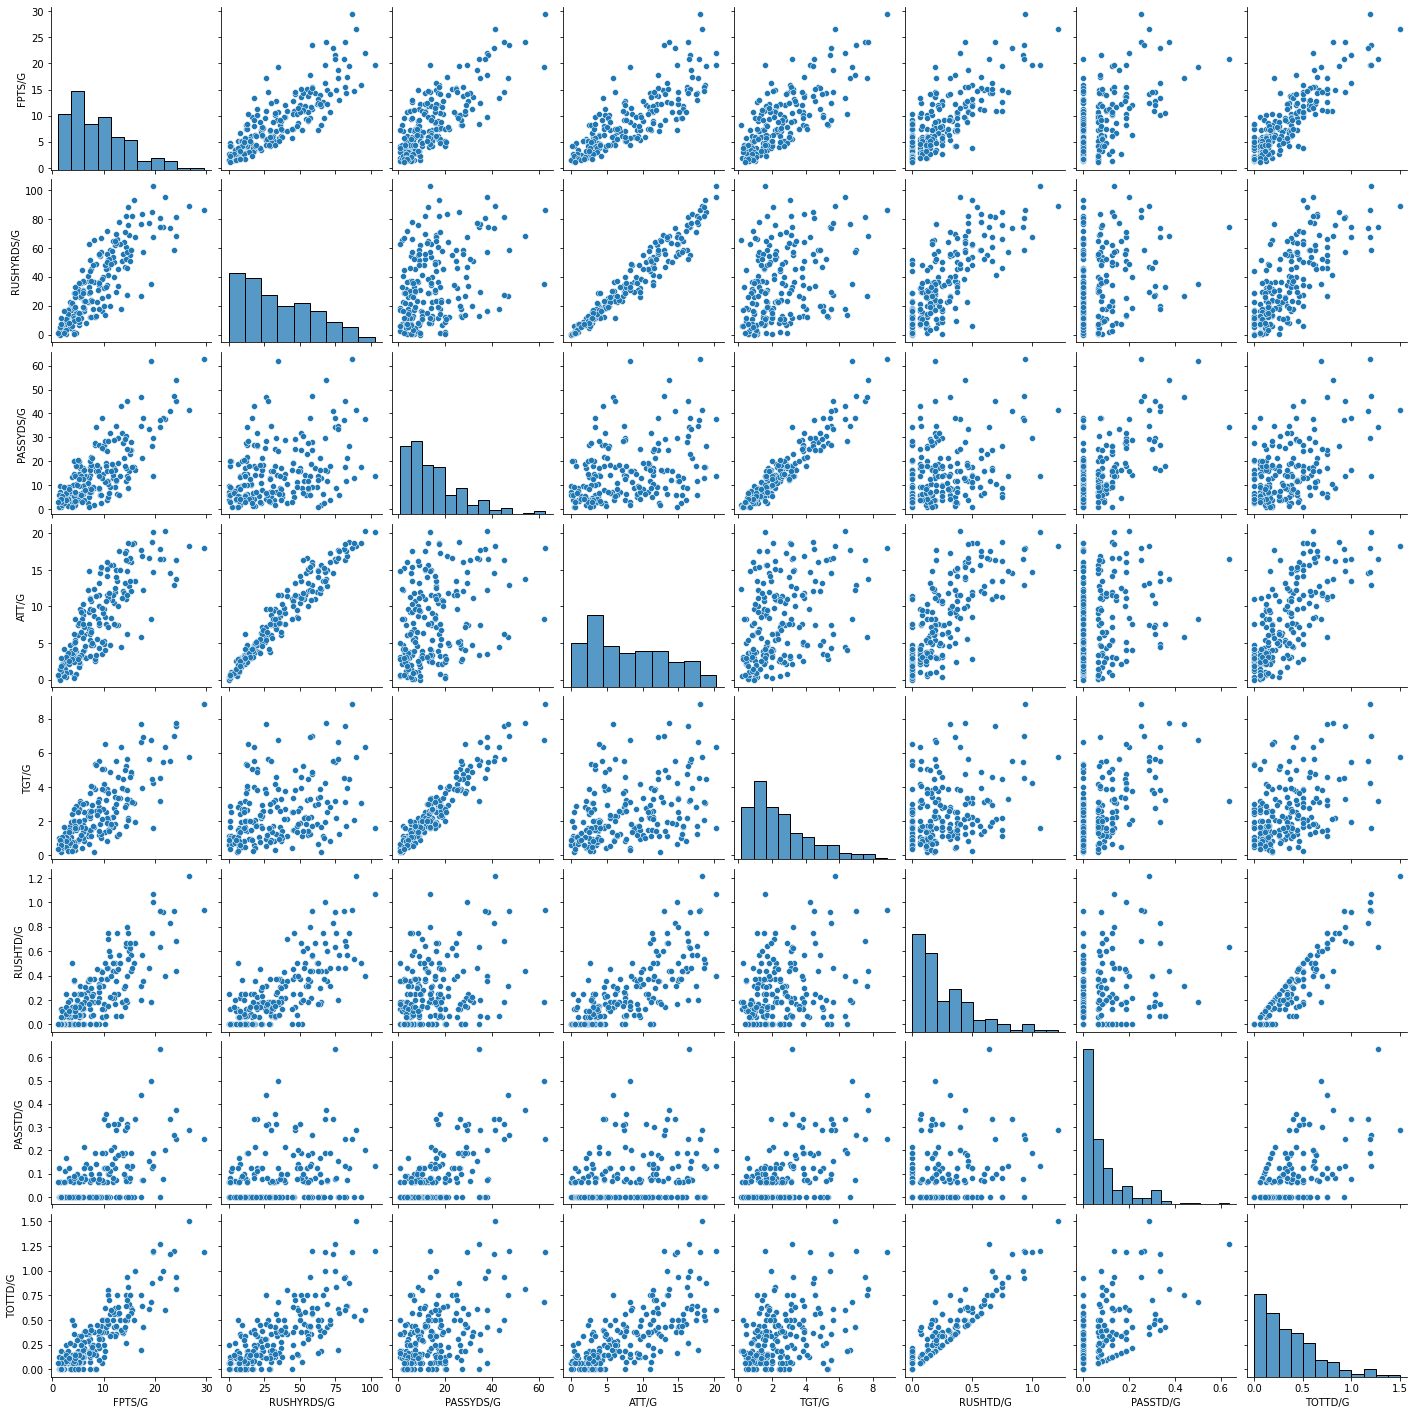

In [81]:
sns.pairplot(values_per_goals)

Based on our visualizations above, we can see that there is a positive linear relationship between our independent variables (passing yards per game PASSYDS/G, rushing yards per game RUSHYARDS/G, etc.) and our dependent variables FPTS/G. 

Below, we will also create a heat map to visualize the numerical relationship between our independent and dependent variables. 

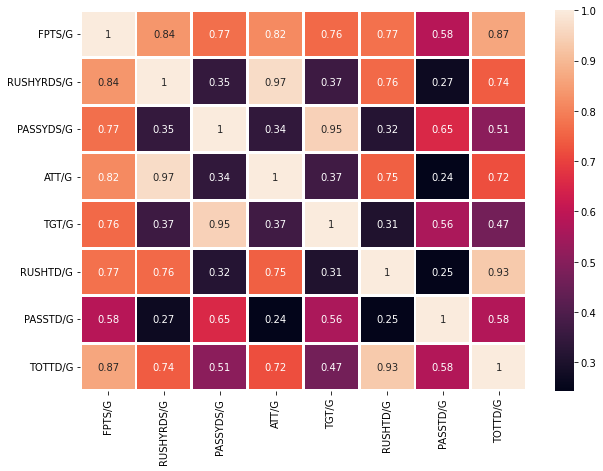

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(values_per_goals.corr(),annot=True,linewidths=2)

Based on our heat mao above, we find that rushing yards per game, rushing attempts per game, and total touchdowns per game have the most impact on our dependent variables fantasy points per game. Passing yards per game, passing targets per game, and rushing touchdowns per game also have a big impact on a running backs fantasy points per game. We also find that passing touchdowns per game has the least impact on a running backs fantasy points per game. We assume that passing touchdowns per game has the least impact on a running backs fantasy production simply because of the nature of the running back position as they aren't typically considered an aerial threat in the passing game since that isn't their main purpose on the offense. As a result of this, we may consider eliminating passing touchdowns per game as one of the independent variables we want to use to create our predictive model. Other than that, we will consider using every other variable but passing touchdowns per game to predict what a running backs average fantasy point production per game. 

In [17]:
top_five = df.sort_values(by=['FPTS/G'],ascending=False).head(5)
print(top_five)

     Rank                     Player  ATT  ...  RUSHTD/G  PASSTD/G  TOTTD/G
100     1  Christian McCaffrey (CAR)  287  ...  0.937500  0.250000   1.1875
2       3        Todd Gurley II (FA)  256  ...  1.214286  0.285714   1.5000
0       1       Saquon Barkley (NYG)  261  ...  0.687500  0.250000   0.9375
1       2  Christian McCaffrey (CAR)  219  ...  0.437500  0.375000   0.8125
3       4          Alvin Kamara (NO)  194  ...  0.933333  0.266667   1.2000

[5 rows x 24 columns]


**Top 5  with Highest Fantasy points per game**

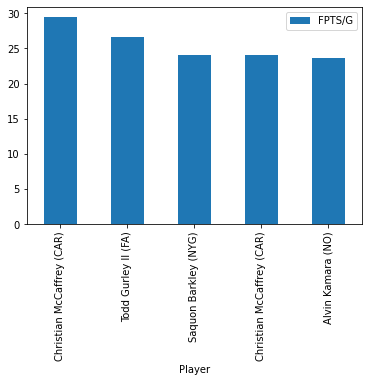

In [18]:
top_five.plot(x='Player', y='FPTS/G',kind='bar')

**Bottom 5 players with the lowest targets** 

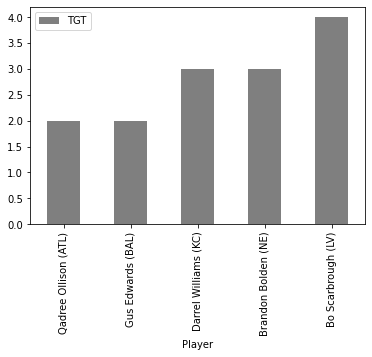

In [82]:
top_five = df.sort_values(by=['TGT'],ascending=True).head(5)
top_five.plot(x='Player', y='TGT',kind='bar',color='C7')

#**Modelling Phase**

***Linear Regression***

**Predicting Fantasy Points per Game.**

Training set = 70%
Test set = 30%






In [21]:
X = df.drop(['FPTS/G','Player'], axis=1)
Y = df['FPTS/G']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
print (x_train)

     Rank  ATT  YDS  Y/ATT  ...     TGT/G  RUSHTD/G  PASSTD/G   TOTTD/G
124    25  172  724    4.2  ...  2.500000  0.375000  0.000000  0.375000
97     98    0    0    0.0  ...  0.909091  0.000000  0.000000  0.000000
42     43   40  171    4.3  ...  5.357143  0.000000  0.000000  0.000000
17     18  167  800    4.8  ...  2.750000  0.250000  0.312500  0.562500
5       6  215  973    4.5  ...  5.461538  0.923077  0.076923  1.000000
..    ...  ...  ...    ...  ...       ...       ...       ...       ...
133    34  107  460    4.3  ...  3.214286  0.071429  0.357143  0.428571
137    38  111  498    4.5  ...  3.363636  0.454545  0.181818  0.636364
72     73   50  206    4.1  ...  1.461538  0.153846  0.000000  0.153846
140    41  101  465    4.6  ...  2.615385  0.307692  0.076923  0.384615
37     38  140  578    4.1  ...  1.625000  0.375000  0.000000  0.375000

[139 rows x 22 columns]


In [22]:
model = linear_model.LinearRegression()   # Build a training model
model.fit(x_train, y_train)

LinearRegression()

In [24]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))
print("R2 score :--->>",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

Coefficients: [-2.99207732e-04  4.51580420e-03 -6.93975515e-03  1.01921562e-03
 -1.76507449e-04  7.72975632e-04 -4.44972026e-01  3.29426834e-03
 -5.63285145e-02 -6.59186249e-03  6.44365503e-04 -4.11659748e-01
 -9.18263217e-03  3.08217018e-03  6.60472208e-02  1.04999482e-01
  9.91465077e-02 -6.76802539e-02  8.13264143e-01 -6.88005373e+06
 -6.88005418e+06  6.88006045e+06]
Intercept: -0.021247360559343065
Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 1.00
R2 score :--->> 0.999737762653257
MSE 0.006979184635326609
MAE 0.039827247518972916


The R squared value we calculated for our model is .9997. What this means is the model fit 99.97% of our data. 

**Predicting Fantasy Points using Linear Regression.**

Training set = 70% Test set = 30%

In [26]:
df_new = pd.read_csv("ff_rb.csv")
X = df_new.drop(['FPTS/G','Player'], axis=1)
Y = df_new['FPTS/G']

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(['FPTS','Player'], axis=1)
Y = df['FPTS']

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
print (x_train)

     Rank  ATT  YDS  Y/ATT  ...     TGT/G  RUSHTD/G  PASSTD/G   TOTTD/G
124    25  172  724    4.2  ...  2.500000  0.375000  0.000000  0.375000
97     98    0    0    0.0  ...  0.909091  0.000000  0.000000  0.000000
42     43   40  171    4.3  ...  5.357143  0.000000  0.000000  0.000000
17     18  167  800    4.8  ...  2.750000  0.250000  0.312500  0.562500
5       6  215  973    4.5  ...  5.461538  0.923077  0.076923  1.000000
..    ...  ...  ...    ...  ...       ...       ...       ...       ...
133    34  107  460    4.3  ...  3.214286  0.071429  0.357143  0.428571
137    38  111  498    4.5  ...  3.363636  0.454545  0.181818  0.636364
72     73   50  206    4.1  ...  1.461538  0.153846  0.000000  0.153846
140    41  101  465    4.6  ...  2.615385  0.307692  0.076923  0.384615
37     38  140  578    4.1  ...  1.625000  0.375000  0.000000  0.375000

[139 rows x 22 columns]


In [28]:
from sklearn import linear_model   # Defines regression model 

model = linear_model.LinearRegression()   # Build a training model

model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)
y = pd.DataFrame(y_pred,columns = ['Predictions'])

In [30]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))
print("R2 score :--->>",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

Coefficients: [ 1.81072075e-03 -5.81388909e-02  1.04257118e-01  1.83972374e-02
 -7.69907664e-04 -5.41973289e-03  6.59726618e+00  1.51057652e-01
  6.98105380e-01  1.00882897e-01 -2.30039679e-02  6.09003477e+00
 -2.50455712e-01 -4.09656082e-02  1.22151090e+01 -1.28571485e+00
 -1.20968575e+00  8.63532652e-01 -1.01034050e+01 -8.92481065e+08
 -8.92481060e+08  8.92480984e+08]
Intercept: 0.48328960818182054
Mean squared error (MSE): 1.08
Coefficient of determination (R^2): 1.00
R2 score :--->> 0.9998040058904084
MSE 1.0750037466184752
MAE 0.5167805138315054


In [56]:
y_test.head(5)

175     3.093750
40      7.493750
34     10.700000
90      1.606250
145     7.946154
Name: FPTS/G, dtype: float64

In [70]:
X = df.drop(['FPTS/G','Player','ATT',	'YDS',	'Y/ATT'	,'LG'	,'20+',	'TD',	'REC'	,'TGT',	'YDS'	,'Y/REC',	'TD','FL',	'G',	'FPTS'], axis=1)
Y = df['FPTS/G']

In [71]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
print (x_train)

     Rank  YDS.1  TD.1  RUSHYRDS/G  ...     TGT/G  RUSHTD/G  PASSTD/G   TOTTD/G
124    25    309     0   45.250000  ...  2.500000  0.375000  0.000000  0.375000
97     98    105     0    0.000000  ...  0.909091  0.000000  0.000000  0.000000
42     43    384     0   12.214286  ...  5.357143  0.000000  0.000000  0.000000
17     18    276     5   50.000000  ...  2.750000  0.250000  0.312500  0.562500
5       6    497     1   74.846154  ...  5.461538  0.923077  0.076923  1.000000
..    ...    ...   ...         ...  ...       ...       ...       ...       ...
133    34    253     5   32.857143  ...  3.214286  0.071429  0.357143  0.428571
137    38    213     2   45.272727  ...  3.363636  0.454545  0.181818  0.636364
72     73    135     0   15.846154  ...  1.461538  0.153846  0.000000  0.153846
140    41    181     1   35.769231  ...  2.615385  0.307692  0.076923  0.384615
37     38    141     0   36.125000  ...  1.625000  0.375000  0.000000  0.375000

[139 rows x 10 columns]


In [72]:
from sklearn import linear_model   # Defines regression model 
model = linear_model.LinearRegression()   # Build a training model
model.fit(x_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(x_test)
y = pd.DataFrame(y_pred,columns = ['Predictions'])

In [74]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))
print("R2 score :--->>",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

Coefficients: [-1.44423455e-04  1.56834370e-03 -1.81194754e-01  1.01389713e-01
  9.38012023e-02 -1.75744703e-02  7.22768345e-01 -6.86278090e+08
 -6.86278088e+08  6.86278096e+08]
Intercept: -0.06091219418262561
Mean squared error (MSE): 0.06
Coefficient of determination (R^2): 1.00
R2 score :--->> 0.997625412084488
MSE 0.0631972817793048
MAE 0.18589150702510332


Text(0, 0.5, 'Predicted')

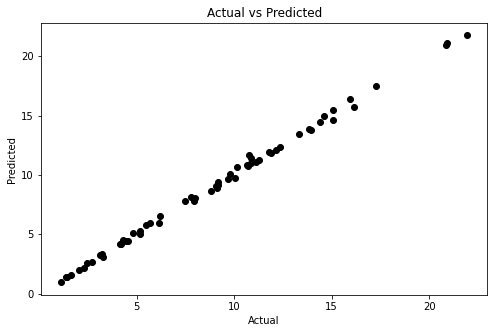

In [75]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color ='black')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Ensemble Learning

***Random Forest***

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
#Build the rantdom forest classifier
rf=RandomForestRegressor(random_state=1)
#fit the training set data 
rf.fit(x_train, y_train)
#make the prediction on the train set 
y_pred_test=rf.predict(x_test)
# Evaluate the test set RMSE
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))
print("R2 score :--->>",r2_score(y_test,y_pred_test))
print("MSE",mean_squared_error(y_test,y_pred_test))
print("MAE",mean_absolute_error(y_test,y_pred_test))

Coefficients: [-1.44423455e-04  1.56834370e-03 -1.81194754e-01  1.01389713e-01
  9.38012023e-02 -1.75744703e-02  7.22768345e-01 -6.86278090e+08
 -6.86278088e+08  6.86278096e+08]
Intercept: -0.06091219418262561
Mean squared error (MSE): 1.61
Coefficient of determination (R^2): 0.94
R2 score :--->> 0.9394962445248035
MSE 1.610246922631902
MAE 0.9263370697558329


***Bagging Ensemble***

In [69]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(x_train, y_train)
y_pred_test=model.predict(x_test)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))
print("R2 score :--->>",r2_score(y_test,y_pred_test))
print("MSE",mean_squared_error(y_test,y_pred_test))
print("MAE",mean_absolute_error(y_test,y_pred_test))

Mean squared error (MSE): 1.95
Coefficient of determination (R^2): 0.93
R2 score :--->> 0.9267178359603083
MSE 1.9503314827638247
MAE 1.010805409075
